# 3. Profiling

> *Profiling o perfilaje es el conjunto de tecicas que nos permiten entender el comportamiento de un programa.*

## 3.1 Una aproximación intuitiva

In [1]:
%matplotlib inline

Generando conjunto de Julia
Puntos: 4004001
Completado: 100.00%
Tiempo total: 0:00:32.967812


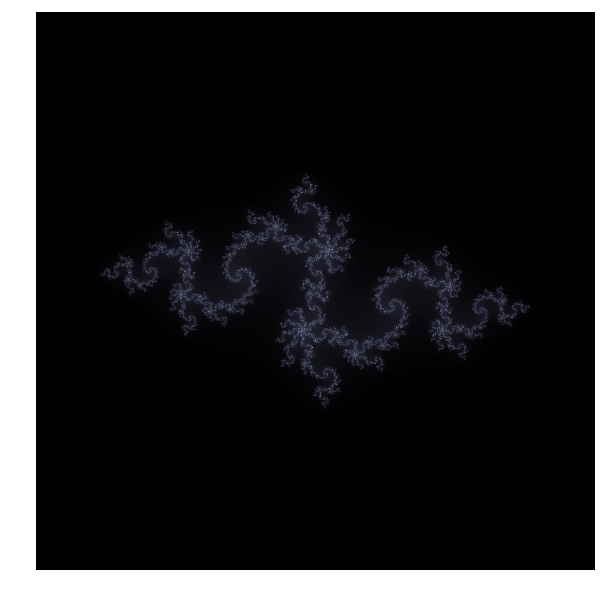

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime

# Limites de la region a estudiar
xL, xU, yL, yU = -2, +2, -2, +2

# resolucion de la imagen
r = 2000

# numero maximo de iteraciones
max_it = 200

# Grillado de la region a estudiar
x = [xL + i * (float(xU) - float(xL)) / (float(r)) for i in range(r + 1)]
y = [yL + i * (float(yU) - float(yL)) / (float(r)) for i in range(r + 1)]

# Constantes a emplearse como c en
# z_n+1 = z_n*z_n + c
c = complex(-0.8350000, -0.23210000)

# Preparecion del mallado en el plano complejo
z = [[complex(re, im) for re in x] for im in y]
q = [[0 for i in range(r + 1)] for j in range(r + 1)]

# "Crunching number"
print("Generando conjunto de Julia")
print("Puntos: {}".format(len(x) * len(y)))
timer = datetime.datetime.now()
for i in range(len(x)):
    for j in range(len(y)):
        p = i + j + i * r

        if p % (r + 1) == 0:
            p = 100.0 * float(p) / float((r + 1) * (r + 1))
            print("\rCompletado: {0:>7.3f}%".format(p), end="")

        for k in range(max_it):
            z[i][j] = (z[i][j] * z[i][j]) + c
            if abs(z[i][j]) > 2:
                q[i][j] = k
                break

print("\rCompletado: 100.00%")
timer = datetime.datetime.now() - timer
print("Tiempo total: {0:}".format(timer))

# Output figure
plt.figure(figsize=(10, 10), frameon=False)
plt.imshow(q, extent=[xL, xU, yL, yU], cmap=cm.bone)
plt.axis('off')
plt.show()

## 3.2 Escribiendo nuestro ejemplo en términos de funciones

### 3.2.1 Disecionando el programa

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime

In [4]:
def make_meshgrid(X, Y, empty=False):
    if empty:
        return [[0 for i in range(len(X))] for j in range(len(Y))]

    return [[complex(re, im) for re in X] for im in Y]

In [5]:
def make_plot(data, boundaries):
    plt.figure(figsize=(10, 10), frameon=False)
    plt.imshow(data, extent=boundaries, cmap=cm.bone)
    plt.axis('off')
    plt.show()

In [6]:
def make_julia_set_1(Z, q, c, it, verbose=False):
    r = len(Z)

    for i in range(r):
        for j in range(r):
            if verbose:
                p = i + j + i * (r - 1)

                if p % r == 0:
                    p = 100.0 * float(p) / float(r * r)
                    print("\rCompletado: {0:>7.3f}%".format(p), end="")

            for k in range(it):
                Z[i][j] = (Z[i][j] * Z[i][j]) + c
                if abs(Z[i][j]) > 2:
                    q[i][j] = k
                    break

    if verbose:
        print("\rCompletado: 100.000%")

    return Z, q

In [7]:
def basic_profiler(f, args=[], kwargs={}):
    timer = datetime.datetime.now()

    output = f(*args, **kwargs)

    timer = datetime.datetime.now() - timer
    print("Tiempo total: {0:}".format(timer))

    return output

In [8]:
def main(f, plot=False):
    # Limites de la region a estudiar
    xL, xU, yL, yU = -2, +2, -2, +2

    # resolucion de la imagen
    r = 2000

    # numero maximo de iteraciones
    max_it = 200

    # Grillado de la region a estudiar
    x = [xL + i * (float(xU) - float(xL)) / (float(r)) for i in range(r + 1)]
    y = [yL + i * (float(yU) - float(yL)) / (float(r)) for i in range(r + 1)]

    # Constantes a emplearse como c en
    # z_n+1 = z_n*z_n + c
    c = complex(-0.8350000, -0.23210000)

    # Preparecion del mallado en el plano complejo
    z = make_meshgrid(x, y, empty=False)
    q = make_meshgrid(x, y, empty=True)

    print("Generando conjunto de Julia")
    print("Puntos: {}".format(len(x) * len(y)))

    # Crunching number and profiling
    z, q = basic_profiler(f, args=[z, q, c, max_it], kwargs={'verbose': True})
    
    # Fancy Plot
    if plot:
        make_plot(q, [xL, xU, yL, yU])

### 2.2.2 Una mejora inesperada en los tiempos

Generando conjunto de Julia
Puntos: 4004001
Completado: 100.000%
Tiempo total: 0:00:22.747937


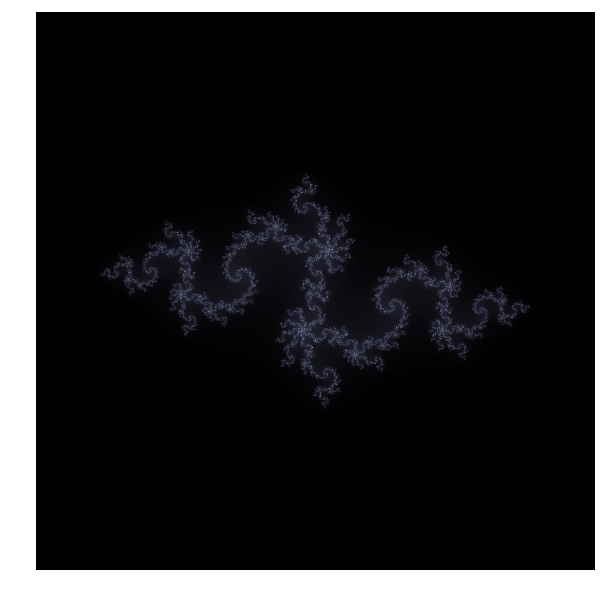

In [9]:
if __name__ == '__main__':
    main(make_julia_set_1, plot=True)

### 3.2.3 Una mejora más

In [10]:
def make_julia_set_2(Z, q, c, it, verbose=False):
    r = len(Z)

    for i in range(r):
        for j in range(r):
            if verbose:
                p = i + j + i * (r - 1)

                if p % r == 0:
                    p = 100.0 * float(p) / float(r * r)
                    print("\rCompletado: {0:>7.3f}%".format(p), end="")
            z = Z[i][j] 
            for k in range(it):
                z = (z * z) + c
                if abs(z) > 2:
                    q[i][j] = k
                    break

    if verbose:
        print("\rCompletado: 100.000%")

    return Z, q

Generando conjunto de Julia
Puntos: 4004001
Completado: 100.000%
Tiempo total: 0:00:14.004513


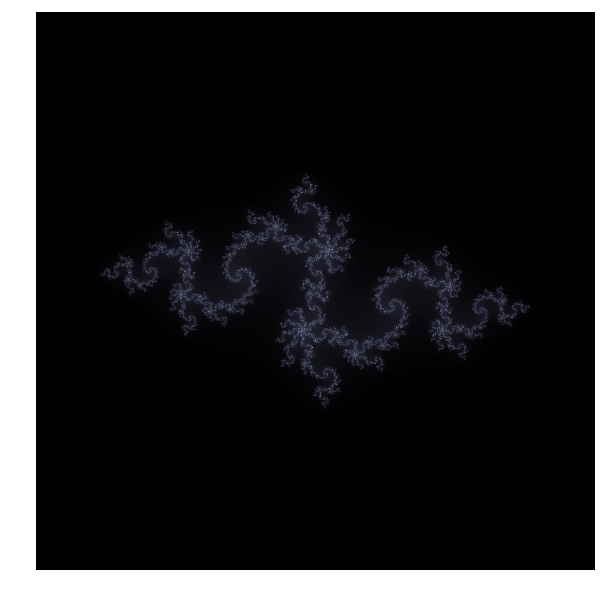

In [11]:
if __name__ == '__main__':
    main(make_julia_set_2, plot=True)